# UAS Mata Kuliah Data Mining
## Penerapan Data Mining untuk Deteksi Penggunaan Masker Menggunakan Algoritma Convolutional Neural Network (CNN)

### Nama Anggota Kelompok
1. Muhammad Akmal Rifad (2009106010)
2. Nurhidayah Anugrah (2009106121)

## Jobdesk

Muhammad Akmal Rifad

1. Data Collecting
2. Data Preprocessing
3. Data Analysis and Visualization


Nurhidayah Anugrah

4. Data Modeling
5. Evaluasi
6. Predict

## IMPORT LIBRARY

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import numpy as np
import seaborn as sns
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## DATA COLLECTING

Dataset yang digunakan untuk penelitian ini bersumber dari kaggle https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection dalam penelitian ini hanya menggunakan 2000 gambar untuk diteliti karena ada beberapa gambar yang tidak memiliki resolusi tinggi dan angle kurang akurat tidak digunakan. Untuk split data dilakukan secara manual. Gambar dibagi 70/20/10 atas set train, set validasi dan set testing.
Dataset ini terdiri dari 2000 gambar milik dua kelas:
1. with_mask: 1000 gambar
2. without_mask: 1000 gambar


## Read Data

In [2]:
train_path = r'./Dataset/train' #train (data latih)
val_path = r'./Dataset/val' #validation (validasi untuk data latih)
test_path = r'./Dataset/test' #test (data testing untuk menguji model)

## DATA PREPROCESSING

## Augmented Data

Generate dan augmentasi data image dari sebuah file/folder.

In [4]:
image_path= r'./Dataset'
train_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, #nilai yang dengannya kita akan mengalikan data sebelum pemrosesan lainnya. antara 0 dan 1
    horizontal_flip = True, #membalik separuh gambar secara acak
    rotation_range= 30, #nilai dalam derajat (0-180), rentang untuk memutar gambar secara acak
    shear_range=.2, #menerapkan transformasi geser secara acak dengan skala 0.2
    zoom_range=.2, #menerapkan transformasi geser secara acak dengan range 0.2
    fill_mode='nearest' #strategi yang digunakan untuk mengisi piksel yang baru dibuat, yang dapat muncul setelah rotasi atau pergeseran lebar/tinggi.
    
)

val_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, 
)

test_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, 
)

## Load Data

Mendefinisikan darimana sumber datanya berasal

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_path, #mengarahkan ke directory train
    target_size = (150,150), #semua gambar akan diubah ukurannya menjadi 150x150
    shuffle=True, #akan mengacak data. Bawaan: Benar. Jika disetel ke False, urutkan data dalam urutan alfanumerik.
    batch_size = 64, #ukuran kumpulan data
    class_mode ='binary' # berarti bahwa label (hanya boleh ada 2)
    
)

val_generator = val_datagen.flow_from_directory(
    val_path, #mengarahkan ke directory val
    target_size = (150,150),
    shuffle=True,
    batch_size = 64,
    class_mode ='binary'
    
)

test_generator = test_datagen.flow_from_directory(
    test_path, #mengarahkan ke directory test
    target_size = (150,150),
    shuffle=True,
    batch_size = 64,
    class_mode ='binary'
    
)

Found 1400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## DATA ANALYSIS DAN VISUALIZATION

C:\Users\MSi-Modern\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(64, 150, 150, 3)


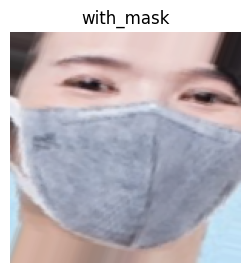

(64, 150, 150, 3)


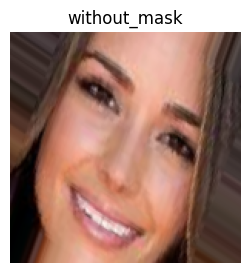

(64, 150, 150, 3)


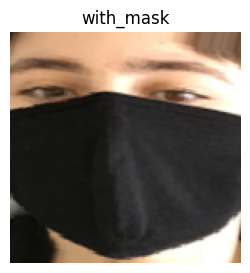

(64, 150, 150, 3)


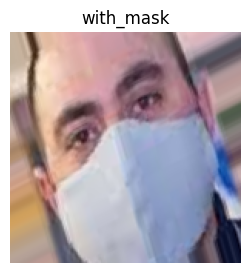

(64, 150, 150, 3)


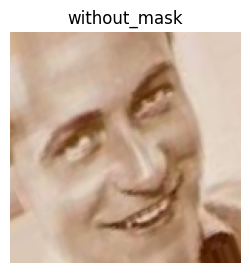

(64, 150, 150, 3)


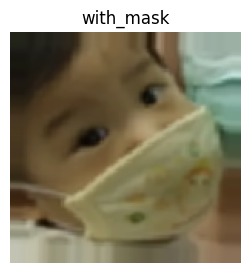

(64, 150, 150, 3)


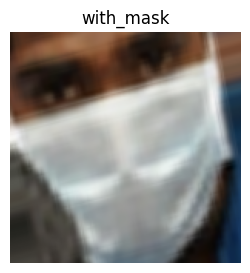

(64, 150, 150, 3)


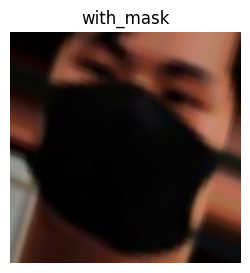

(64, 150, 150, 3)


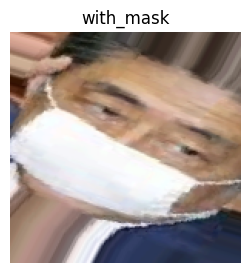

(64, 150, 150, 3)


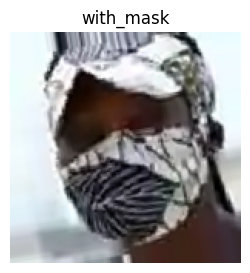

In [7]:
for i in range(10): #perulangan dengan menampilkan hanya 5 gambar
    img, label = train_generator.next()
    print(img.shape)
    plt.figure(figsize=(3, 3))
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("with_mask")
    else:
        plt.title("without_mask")
    plt.axis("Off") #menghilangkan grid
    plt.show() #menampilkan gambar

In [9]:
label_name= ['with_mask','without_mask'] #menampikan visualisasi jumlah data dari 2 class

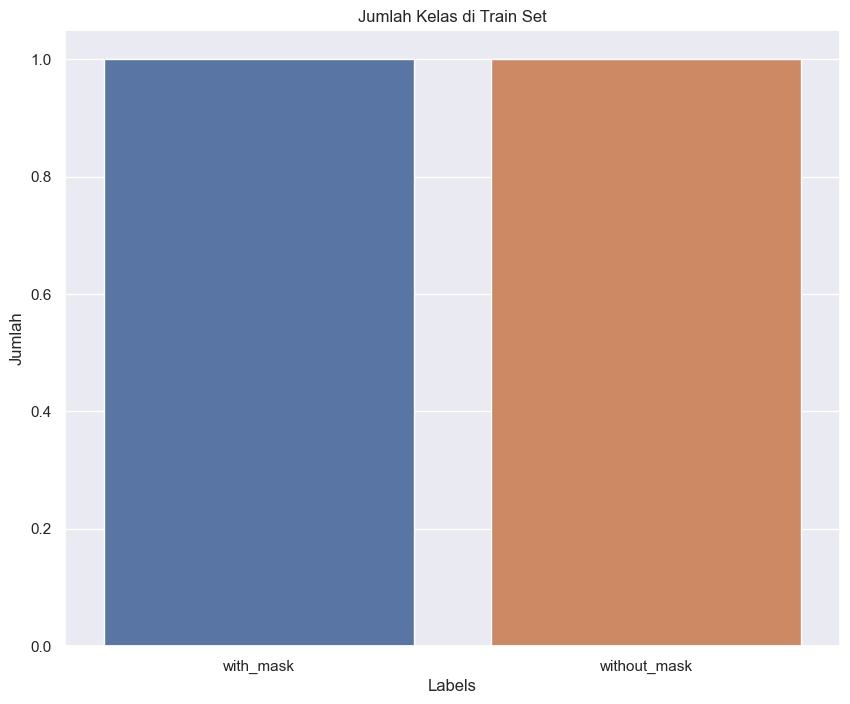

In [10]:
plt.figure(figsize=(10, 8))
sns.set_theme()

sns.countplot(x=label_name)
plt.xlabel('Labels')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Set')
plt.show()

## MODELLING

Model sequential atau model yang berurutan adalah bentuk model yang paling umum digunakan dalam membuat DNN.

In [12]:
model = tf.keras.Sequential([ #langkah kompleks konvolusi nya dengan satu baris kode
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150,150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

#LINE 2
#parameter pertama (32) adalah nilai filter nya
#parameter kedua dimensi filter nya
#parameter ketiga adalah fungsi aktivasi yang kita gunakan (relu) disini kita menggunakan rectifier function.
#parameter keempat cukup self explained disini yakni bentuk input nya dan tipe nya (RGB atau Black/white)

In [13]:
model.summary() #melihat keseluruhan network model yang sudah dibuat diatas

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 1)                 43809     
                                                                 
Total params: 44,033
Trainable params: 44,033
Non-trainable params: 0
_________________________________________________________________


### Compile model 

Menyusun model menjadi siap dilakukan proses training.

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(), #merupakan metode optimasi yang digunakan.
    loss=tf.keras.losses.binary_crossentropy, #adalah metode pengukuran nilai loss berdasarkan pada nilai apa. karena Membuat flow datanya kita menggunakan binary sehingga pada nilai loss ini kita juga menggunakan binary loss.
    metrics=['accuracy'] #nilai matriks yang diukur pada project ini kita menggunakan nilai akurasi sebagai nilai pengukurannya
)

### Proses Training Model

Proses dimana machine learning bekerja sehingga algoritma yang sudah kita definisikan dapat mengingat pola dari masing masing kelas pada data yang kita train

In [17]:
history = model.fit(
    train_generator, #data generator yang sudah kita proses
    epochs=25, #banyaknya proses iterasi/ pengulangan pada training
    validation_data = val_generator #validation data yang dievaluasi pada setiap epoch berakhir
)

C:\Users\MSi-Modern\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/25
22/22 [==============================] - 31s 1s/step - loss: 0.3309 - accuracy: 0.8571 - val_loss: 0.2269 - val_accuracy: 0.9200
Epoch 2/25
22/22 [==============================] - 27s 1s/step - loss: 0.2045 - accuracy: 0.9379 - val_loss: 0.1661 - val_accuracy: 0.9425
Epoch 3/25
22/22 [==============================] - 27s 1s/step - loss: 0.1715 - accuracy: 0.9436 - val_loss: 0.1346 - val_accuracy: 0.9400
Epoch 4/25
22/22 [==============================] - 27s 1s/step - loss: 0.1578 - accuracy: 0.9443 - val_loss: 0.2093 - val_accuracy: 0.9175
Epoch 5/25
22/22 [==============================] - 26s 1s/step - loss: 0.1449 - accuracy: 0.9593 - val_loss: 0.1208 - val_accuracy: 0.9500
Epoch 6/25
22/22 [==============================] - 27s 1s/step - loss: 0.1420 - accuracy: 0.9543 - val_loss: 0.1274 - val_accuracy: 0.9500
Epoch 7/25
22/22 [==============================] - 27s 1s/step - loss: 0.1564 - accuracy: 0.9414 - val_loss: 0.1297 - val_accuracy: 0.9450
Epoch 8/25
22/22 [==

## EVALUASI

In [18]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

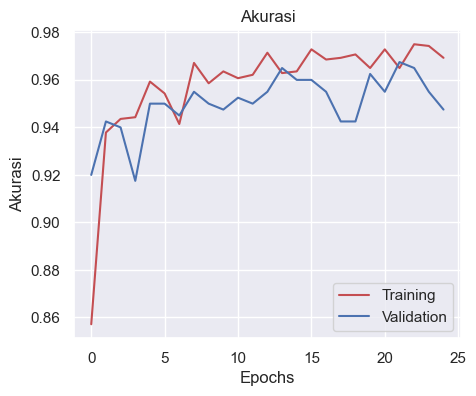

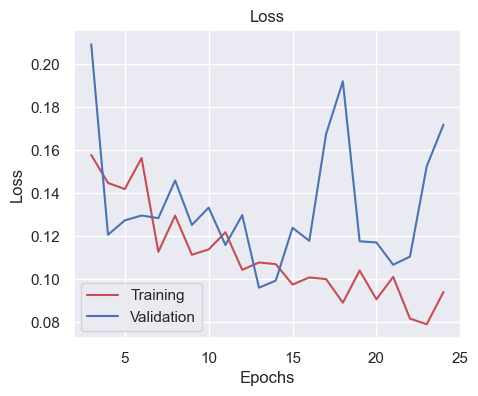

In [19]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model menggunakan data validation

In [20]:
val_evaluate = model.evaluate(val_generator)

print(f'Nilai Acccuracy : {round(val_evaluate[1],2)}')
print(f'Nilai Loss      : {val_evaluate[0]}')

7/7 [==============================] - 3s 496ms/step - loss: 0.1720 - accuracy: 0.9475
Nilai Acccuracy : 0.95
Nilai Loss      : 0.1719694882631302


In [21]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_generator)

4/4 [==============================] - 2s 450ms/step


In [22]:
#Evaluasi model menggunakan data testing

In [23]:
test_evaluate = model.evaluate(test_generator,verbose =0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test loss     : 0.11895444244146347
Test accuracy : 0.96


In [24]:
#Simpan Model yang sudah di training

In [35]:
MODEL_BASE_PATH = "model"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model\model.h5...


## Prediksi

In [36]:
result = model.predict(test_generator)
print(result)

C:\Users\MSi-Modern\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 2s 460ms/step
[[9.99522150e-01]
 [4.45218245e-03]
 [3.27042595e-04]
 [7.72143437e-07]
 [9.95244026e-01]
 [9.99785900e-01]
 [9.99351442e-01]
 [6.90402210e-01]
 [3.07720224e-03]
 [1.04872292e-07]
 [9.99574125e-01]
 [9.99800324e-01]
 [9.99527395e-01]
 [4.37060416e-01]
 [9.99635279e-01]
 [1.11725982e-02]
 [9.93562639e-01]
 [9.99914646e-01]
 [8.49258925e-07]
 [9.96456265e-01]
 [9.95104313e-01]
 [9.99916911e-01]
 [1.99494189e-11]
 [9.99996662e-01]
 [8.43597390e-03]
 [1.98617034e-12]
 [1.21276091e-04]
 [1.48643801e-06]
 [3.46052573e-08]
 [1.63419335e-03]
 [2.88336282e-03]
 [2.57633324e-03]
 [8.78899755e-06]
 [1.13786024e-03]
 [5.82869586e-10]
 [9.99375701e-01]
 [2.94602849e-03]
 [3.77455443e-01]
 [9.94467318e-01]
 [1.85465815e-05]
 [1.09410938e-02]
 [9.99131083e-01]
 [9.92665052e-01]
 [1.34083475e-05]
 [9.99078631e-01]
 [9.96991754e-01]
 [9.98385012e-01]
 [9.99929249e-01]
 [9.98361647e-01]
 [9.65142310e-01]
 [3.10061645e-04]
 [9.53225017e-01]
 [9.9555116

In [37]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=[150,150])
    img_array = keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent with mask and %.2f without mask." % (100 * (1 - score), 100 * score))
    plt.axis("Off")
    plt.imshow(img);

1/1 [==============================] - 0s 55ms/step
This image is 100.00 percent with mask and 0.00 without mask.


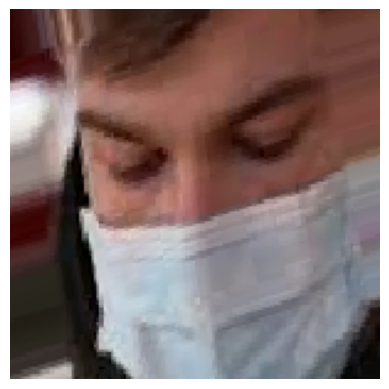

In [38]:
predict_image("./testing/54.png") 

1/1 [==============================] - 0s 27ms/step
This image is 0.00 percent with mask and 100.00 without mask.


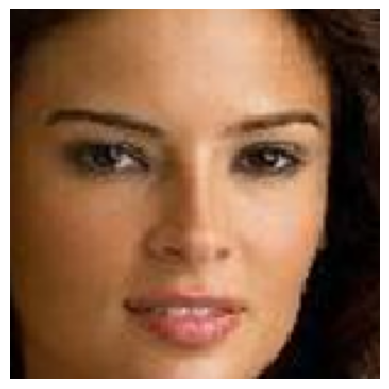

In [39]:
predict_image("./testing/1560.png") 

1/1 [==============================] - 0s 22ms/step
This image is 0.00 percent with mask and 100.00 without mask.


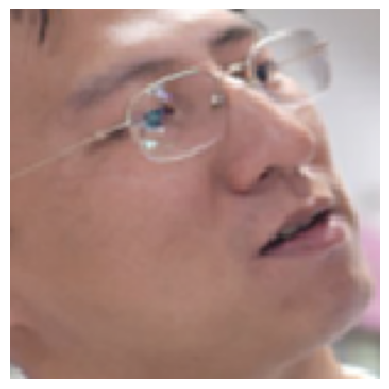

In [40]:
predict_image("./Dataset/test/without_mask/1563.png") 

1/1 [==============================] - 0s 26ms/step
This image is 100.00 percent with mask and 0.00 without mask.


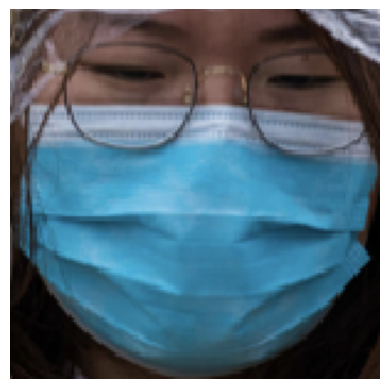

In [41]:
predict_image("./Dataset/test/with_mask/2363.png") 